In [1]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import maxwell  
from pylab import rcParams

## Hidden Parameter Model

In [1]:
#Nice draw
def draw(g):
    rcParams['figure.figsize'] = 14, 10
    pos = nx.spring_layout(g, scale=20, k=3/np.sqrt(g.order()))
    d = dict(g.degree)
    nx.draw(g, pos, node_color='lightblue', 
            with_labels=True, 
            nodelist=d, 
            node_size=[d[k]*300 for k in d])

# plotting  distribution of degrees
def plt_pk(g):
    degrees = [g.degree(n) for n in g.nodes()]
    plt.plot(degrees)
    plt.show()

In [2]:
def hidden_param(n, k, a=4, b=2.5):
    """
    This function uses maxwell distribution to generate a random graph
    using hidden parameter model
    http://networksciencebook.com/chapter/4#generating-networks
    
    """
    g = nx.empty_graph(n)
    
    # Maxwell
    quantile = np.arange(0.01, 1, (1 - 0.01)/float(n))
    rvs = maxwell.pdf(a, b, quantile)
    
    # hidden probabilities are chosen from a series
    c = (k * n) / np.sum(rvs)
    nodes = rvs * c
    
    # constructing graph
    for i in range(n):
        for j in range(n):
            p = ((nodes[i] * nodes[j]) /(k * n))
            if np.random.random() < p:
                g.add_edge(i, j)
    return g
    

In [4]:
n = 100 
k = 3.5

g = hidden_param(n, k)

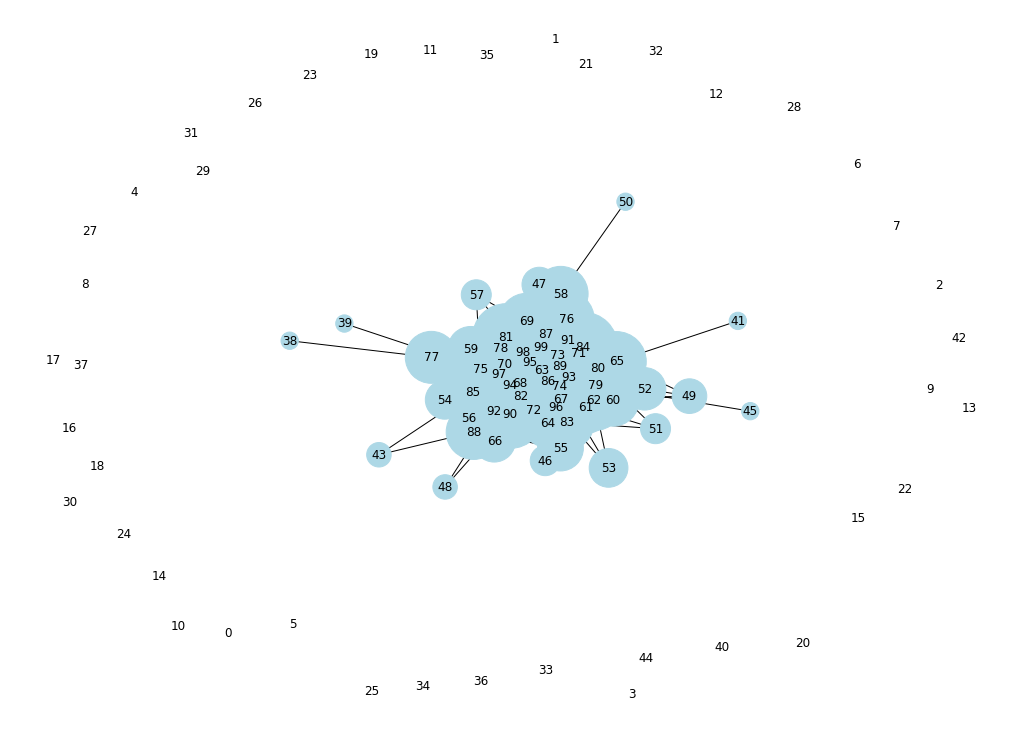

In [5]:
draw(g)

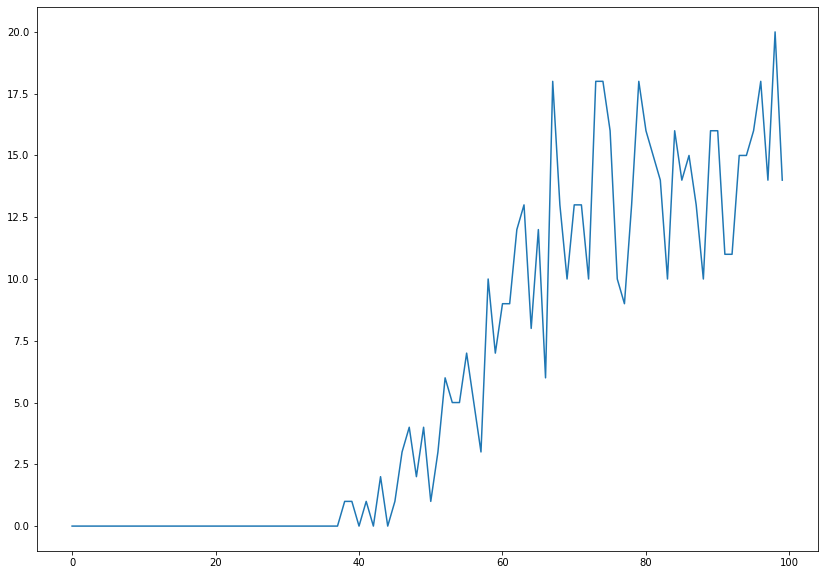

In [6]:
plt_pk(g)

In [7]:
print("Clustering coefficient :", nx.average_clustering(g))

Clustering coefficient : 0.13083629141756078


## Power law

In [8]:
def hidden_param_power_law(n, k, expo=2.2):
    """
    This function uses maxwell distribution to generate a random graph
    using power law distribution
    http://networksciencebook.com/chapter/4#generating-networks
    
    """
    g = nx.empty_graph(n)
    
    # Maxwell
    rvs = nx.utils.powerlaw_sequence(n, expo)
    
    # hidden probabilities are chosen from a series
    #c = (k * n) / np.sum(rvs)
    #nodes = rvs * c
    nodes = rvs
    # constructing graph
    for i in range(n):
        for j in range(n):
            p = ((nodes[i] * nodes[j]) /(k * n))
            if np.random.random() < p:
                g.add_edge(i, j)
    return g

In [9]:
n = 100 
k = 3.5

g = hidden_param_power_law(n, k)

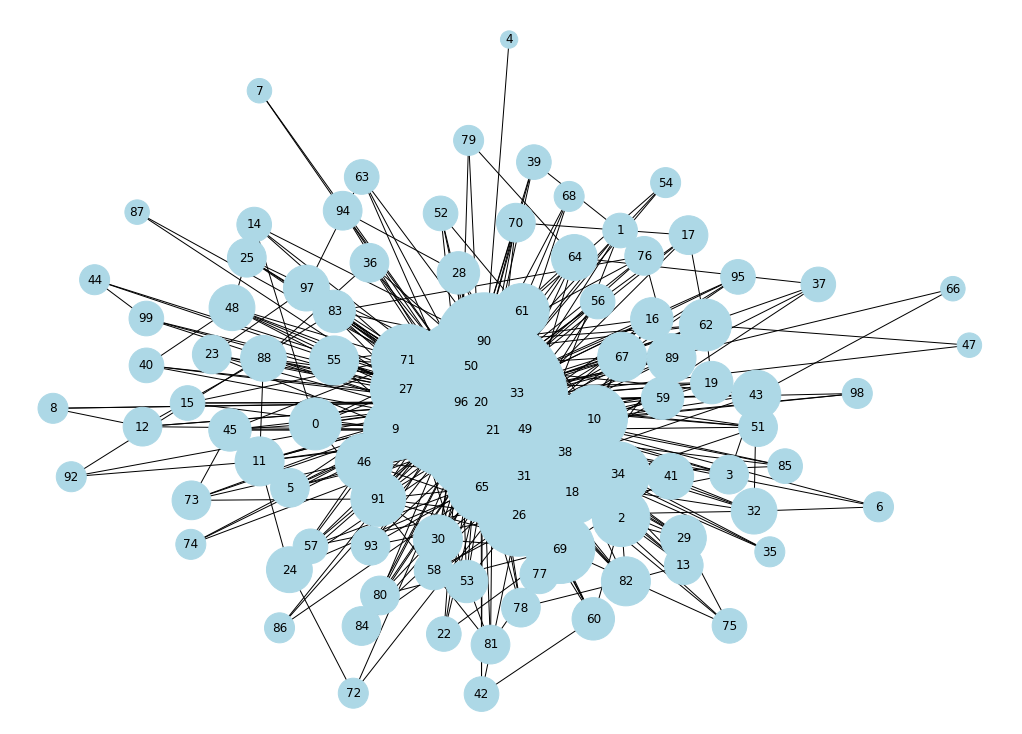

In [10]:
draw(g)

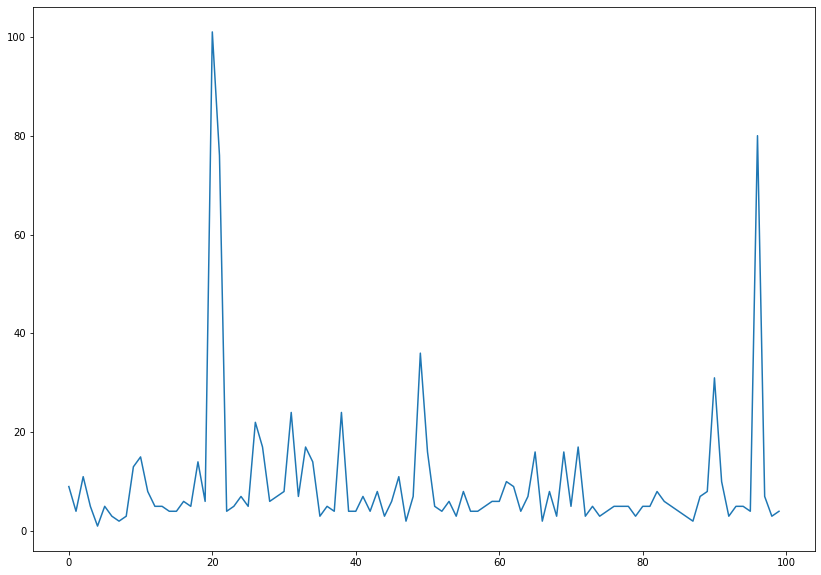

In [11]:
plt_pk(g)

In [12]:
print("Clustering coefficient :", nx.average_clustering(g))

Clustering coefficient : 0.7310201629278725


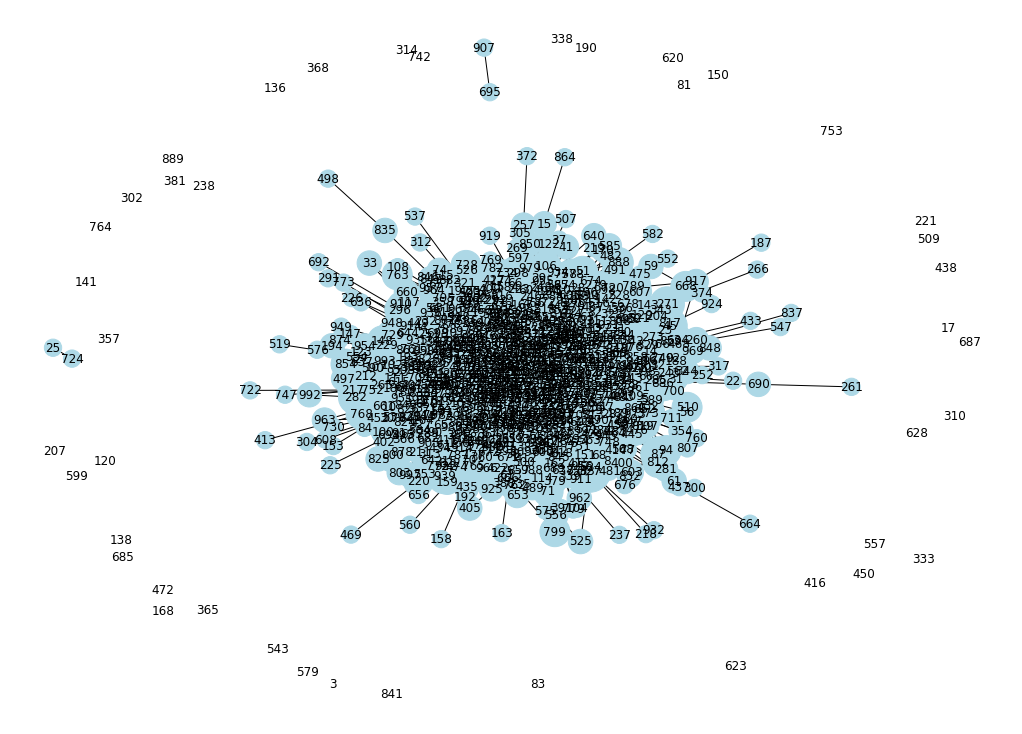

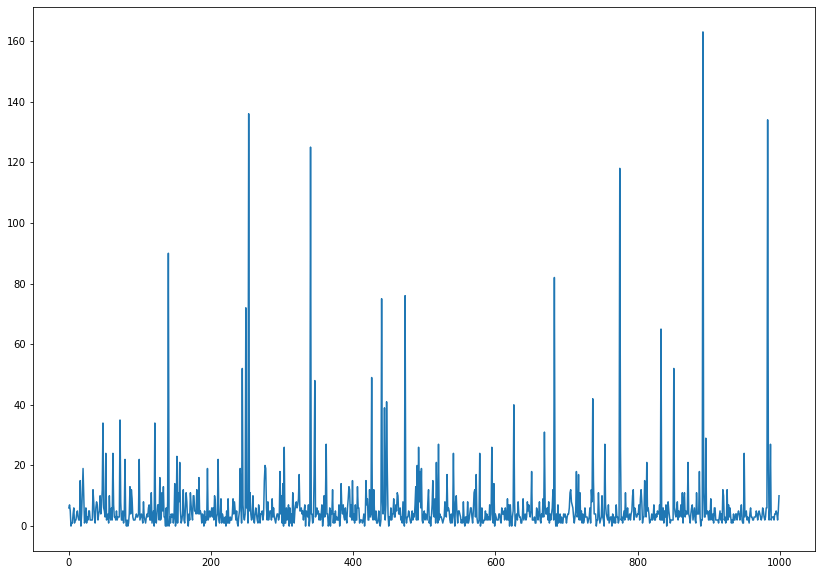

Clustering coefficient : 0.10260657556988838


In [13]:
n = 1000
k = 3.5
expo = 2.2

g = hidden_param_power_law(n, k, expo)

draw(g)
plt.show()
plt_pk(g)
print("Clustering coefficient :", nx.average_clustering(g))

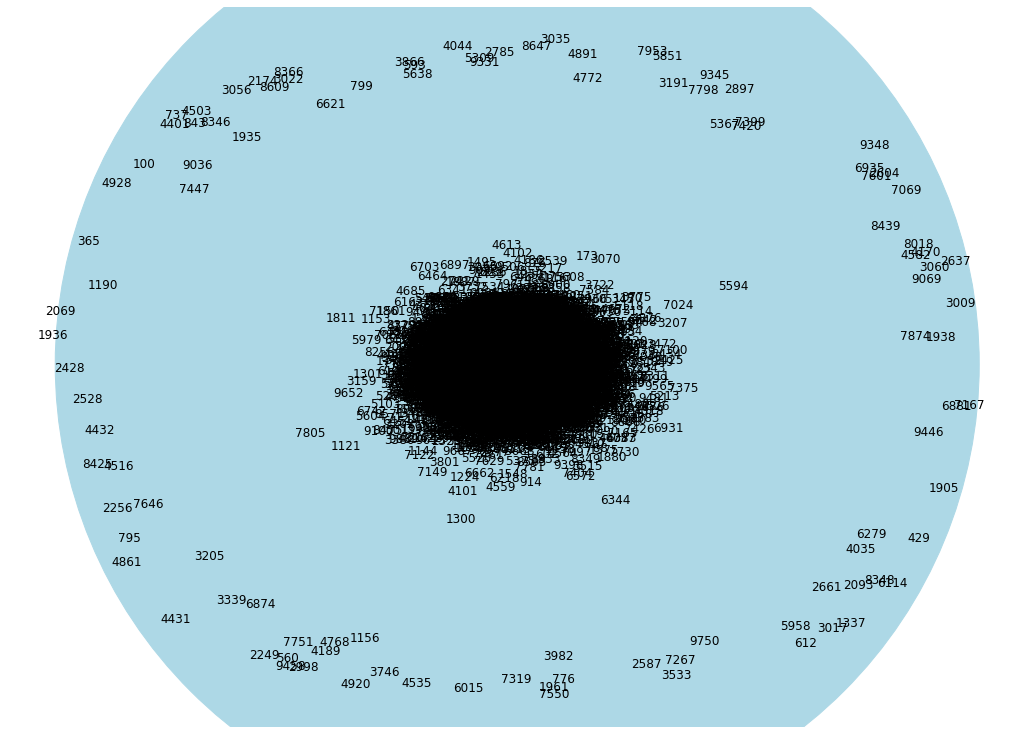

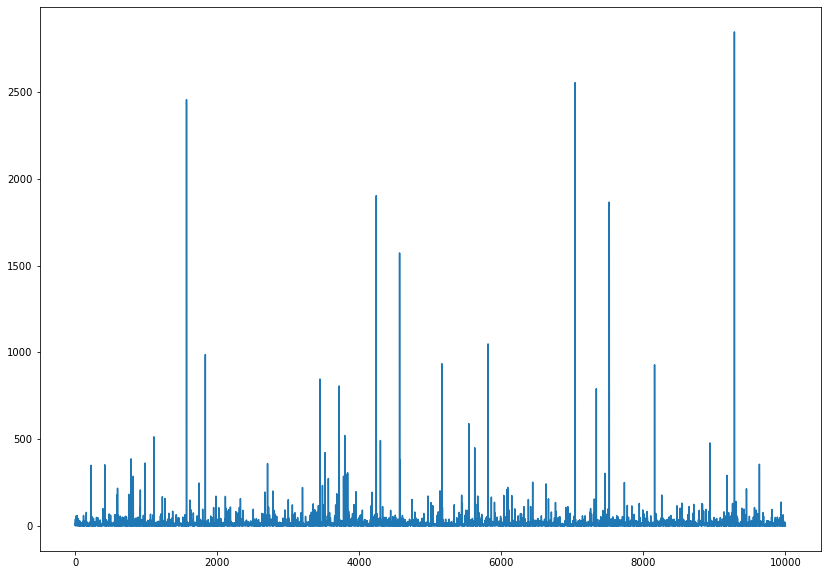

Clustering coefficient : 0.23595659559455548


In [14]:
n = 10000
k = 3.5
expo = 2.2

g = hidden_param_power_law(n, k, expo)

draw(g)
plt.show()
plt_pk(g)
print("Clustering coefficient :", nx.average_clustering(g))

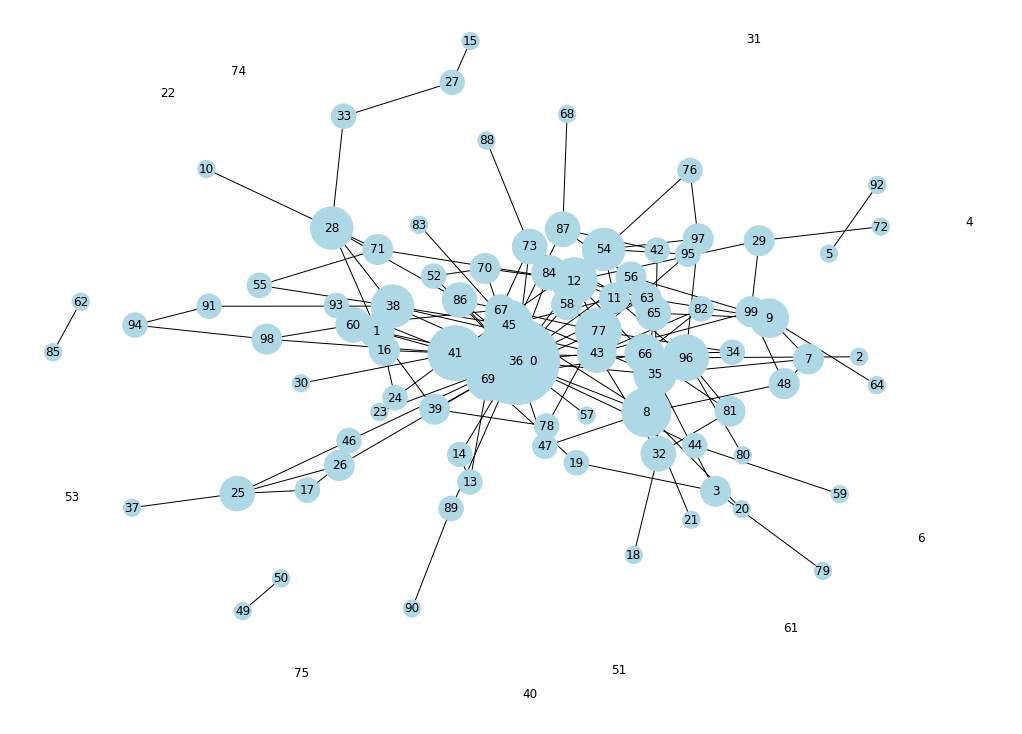

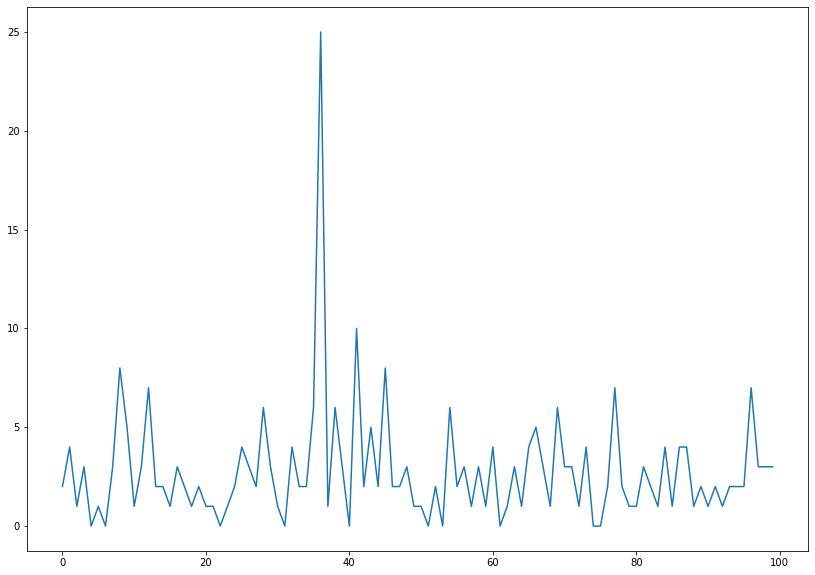

Clustering coefficient : 0.11861001317523057


In [15]:
n = 100
k = 3.5
expo = 3

g = hidden_param_power_law(n, k, expo)

draw(g)
plt.show()
plt_pk(g)
print("Clustering coefficient :", nx.average_clustering(g))

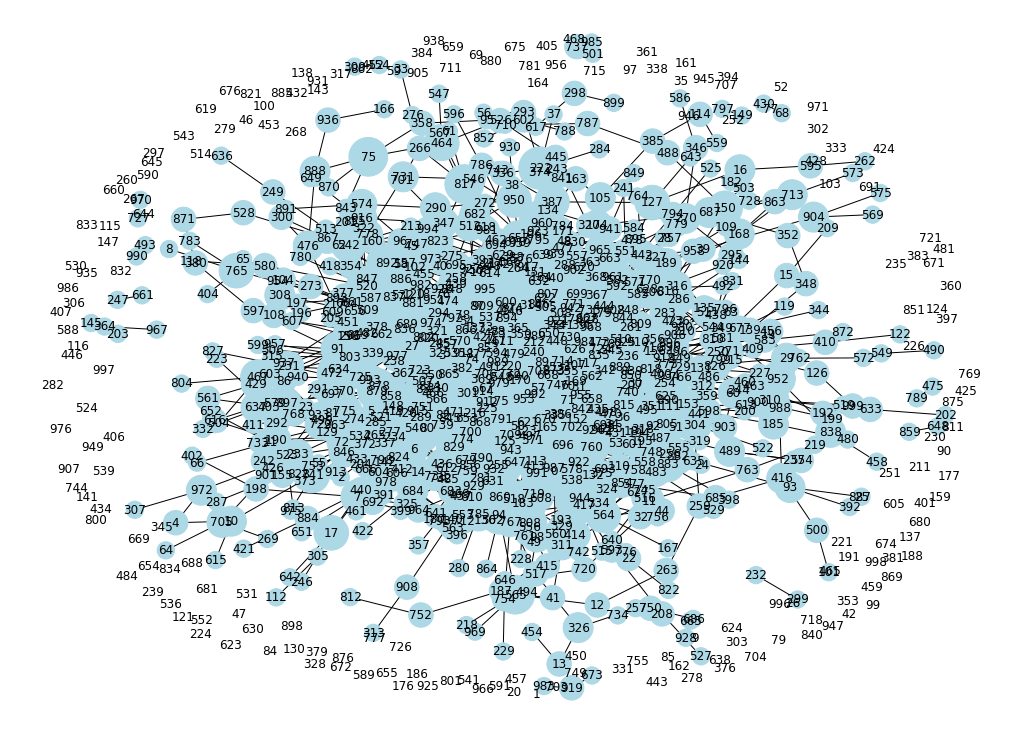

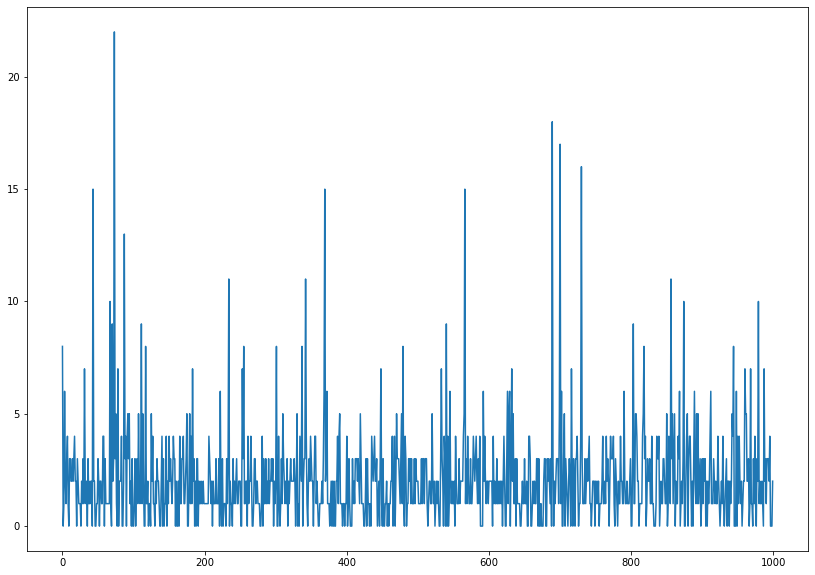

Clustering coefficient : 0.003479124470300941


In [16]:
n = 1000
k = 3.5
expo = 3

g = hidden_param_power_law(n, k, expo)

draw(g)
plt.show()
plt_pk(g)
print("Clustering coefficient :", nx.average_clustering(g))